In [322]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [303]:
for sign in os.listdir('./DataSet/Train/'):
    print(str(len(os.listdir('./DataSet/Train/' + sign))) + " " +sign + " Images")

210 0 Images
2220 1 Images
2010 10 Images
1320 11 Images
2100 12 Images
2160 13 Images
780 14 Images
630 15 Images
420 16 Images
1110 17 Images
1200 18 Images
210 19 Images
2250 2 Images
360 20 Images
330 21 Images
390 22 Images
510 23 Images
270 24 Images
1500 25 Images
600 26 Images
240 27 Images
540 28 Images
270 29 Images
1410 3 Images
450 30 Images
780 31 Images
240 32 Images
689 33 Images
420 34 Images
1200 35 Images
390 36 Images
210 37 Images
2070 38 Images
300 39 Images
1980 4 Images
360 40 Images
240 41 Images
240 42 Images
1860 5 Images
420 6 Images
1440 7 Images
1410 8 Images
1470 9 Images


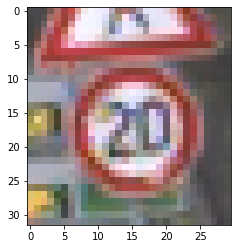

In [309]:
im = image.load_img('C:/Users/DELL/Python for data science class\Dee learning self study/Traffic sign classification using neural network/DataSet/Train/0/00000_00000_00004.png',)
plt.imshow(im)
plt.show()

In [15]:
image.img_to_array(im).shape

(32, 30, 3)

In [16]:
img_size = 30
batch_size = 64

In [243]:
#datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [244]:
#train_dataset = datagen.flow_from_directory("./DataSet/Train/", 
   #                                   target_size=(img_size,img_size),
  #                                    color_mode='rgb',
 #                                     batch_size=batch_size,
 #                                     subset='training',
 #                                     class_mode='categorical')

Found 31368 images belonging to 43 classes.


In [245]:
#validation_dataset = datagen.flow_from_directory("./DataSet/Train/", 
#                                      target_size=(img_size,img_size),
#                                      color_mode='rgb',
#                                      batch_size=batch_size,
#                                      subset='validation',
#                                      class_mode='categorical')

Found 7841 images belonging to 43 classes.


In [246]:
#train_dataset.image_shape[1:]

(30, 3)

In [247]:
#validation_dataset.image_shape

(30, 30, 3)

In [327]:
data = []
labels = []

In [328]:
for sign in range(43):
    path = './DataSet/Train/'+ str(sign) + "/"
    images = os.listdir(path)
    
    for i in images:
        try:
            img = image.load_img(path + str(i), target_size=(img_size,img_size))
            img = np.array(img)
            data.append(img)
            labels.append(int(sign))
        except Exception as e:
            print(e)
    
    

In [329]:
data = np.array(data)
labels = np.array(labels)

In [330]:
np.save('./training/data',data)
np.save('./training/labels',labels)

In [331]:
data = np.load('./training/data.npy')
labels = np.load('./training/labels.npy')

In [332]:
print(data.shape,labels.shape)

(39209, 30, 30, 3) (39209,)


In [363]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state = 10,stratify = labels)

In [368]:
x_train.shape,y_train.shape

((31367, 30, 30, 3), (31367, 43))

In [367]:
x_test.shape,y_test.shape

((7842, 30, 30, 3), (7842, 43))

In [366]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [378]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(5,5),activation='relu',padding='same', input_shape=x_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(43,activation='softmax'))

In [379]:
adam = Adam(lr=0.0005)

In [380]:
model.compile(optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy'],)

In [381]:
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_182 (Conv2D)          (None, 30, 30, 32)        2432      
_________________________________________________________________
max_pooling2d_177 (MaxPoolin (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_178 (MaxPoolin (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_186 (Dropout)        (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_179 (MaxPoolin (None, 3, 3, 128)       

In [382]:
#sign_model = model.fit(x = train_dataset,
#         epochs=20,
#         steps_per_epoch= train_dataset.n//train_dataset.batch_size,
#         validation_data=validation_dataset,
#          validation_steps=validation_dataset.n//validation_dataset.batch_size
#         )

In [383]:
sign_model = model.fit(x_train,y_train, batch_size=32,
         epochs=20,
         validation_data=(x_test,y_test)
         )

Epoch 1/20
981/981 [==============================] - 73s 75ms/step - loss: 3.1071 - accuracy: 0.1895 - val_loss: 1.7345 - val_accuracy: 0.4756
Epoch 2/20
981/981 [==============================] - 73s 75ms/step - loss: 1.5664 - accuracy: 0.4994 - val_loss: 0.8372 - val_accuracy: 0.7480
Epoch 3/20
981/981 [==============================] - 73s 74ms/step - loss: 0.8517 - accuracy: 0.7275 - val_loss: 0.3583 - val_accuracy: 0.8832
Epoch 4/20
981/981 [==============================] - 73s 74ms/step - loss: 0.5391 - accuracy: 0.8290 - val_loss: 0.2357 - val_accuracy: 0.9223
Epoch 5/20
981/981 [==============================] - 73s 74ms/step - loss: 0.3960 - accuracy: 0.8815 - val_loss: 0.1592 - val_accuracy: 0.9524
Epoch 6/20
981/981 [==============================] - 73s 74ms/step - loss: 0.3038 - accuracy: 0.9119 - val_loss: 0.1143 - val_accuracy: 0.9677
Epoch 7/20
981/981 [==============================] - 73s 74ms/step - loss: 0.2647 - accuracy: 0.9260 - val_loss: 0.1018 - val_accuracy:

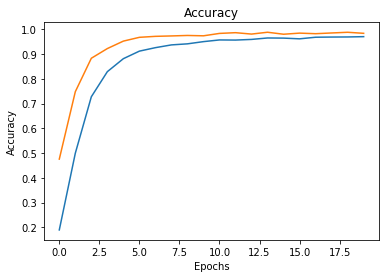

In [384]:
plt.figure()
plt.plot(sign_model.history['accuracy'], label='Training accuracy')
plt.plot(sign_model.history['val_accuracy'], label='Validation accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

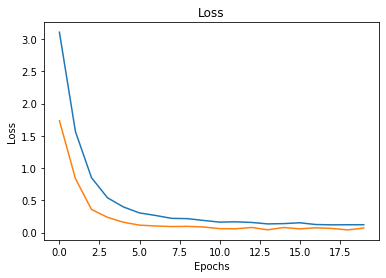

In [385]:
plt.figure()
plt.plot(sign_model.history['loss'], label='Training loss')
plt.plot(sign_model.history['val_loss'], label='Validation loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

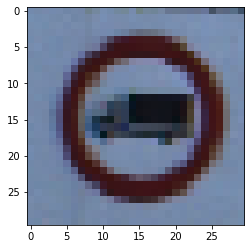

[8]


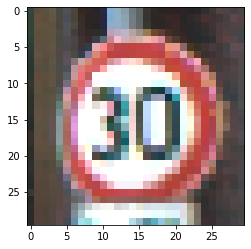

[1]


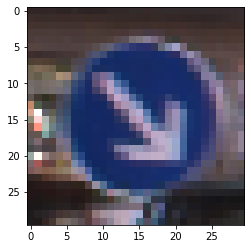

[32]


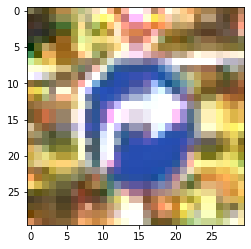

[27]


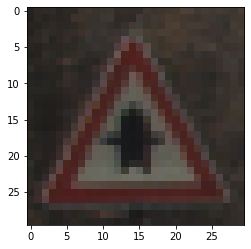

[3]


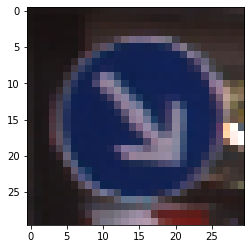

[32]


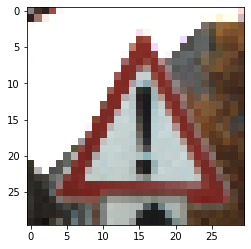

[10]


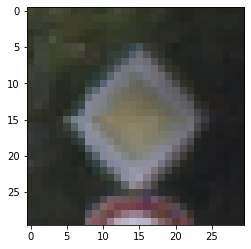

[4]


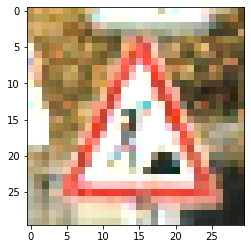

[18]


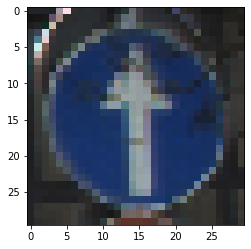

[29]


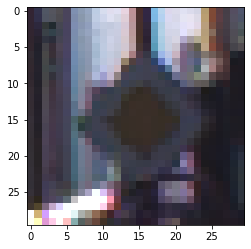

[29]


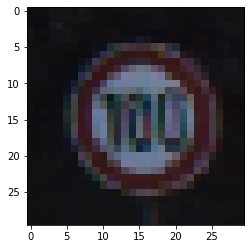

[40]


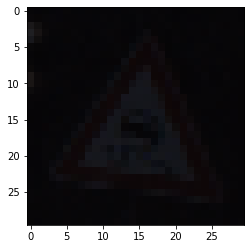

[16]


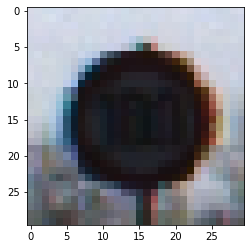

[38]


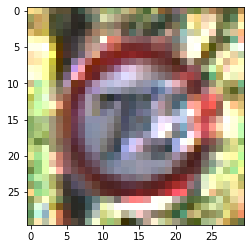

[34]


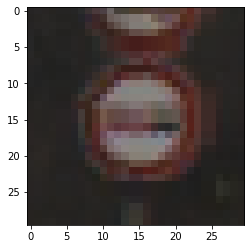

[42]


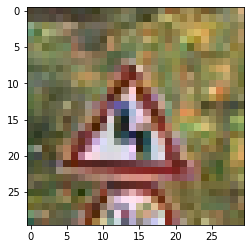

[14]


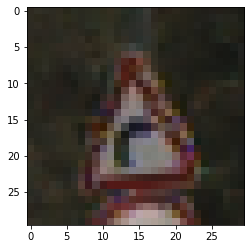

[13]


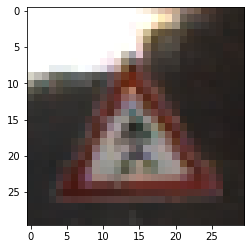

[20]


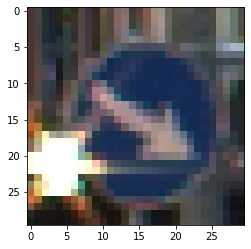

[32]


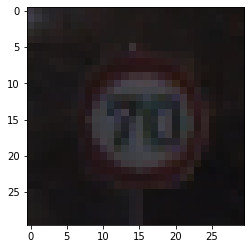

[34]


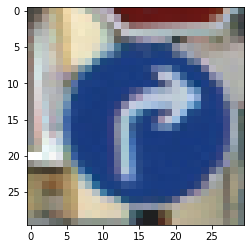

[27]


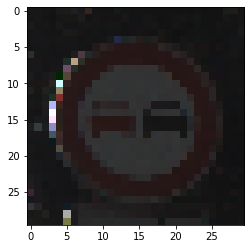

[42]


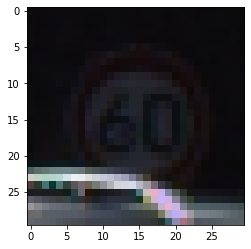

[3]


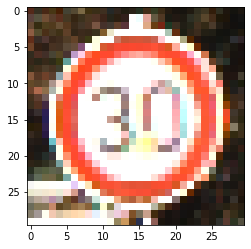

[1]


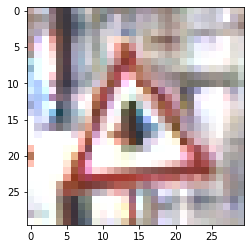

[3]


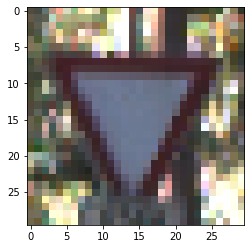

[5]


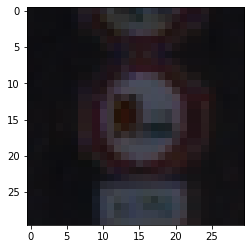

[2]


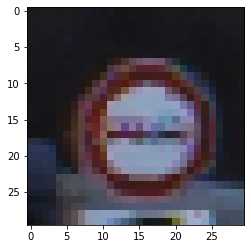

[42]


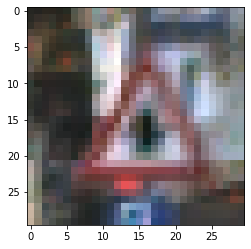

[3]


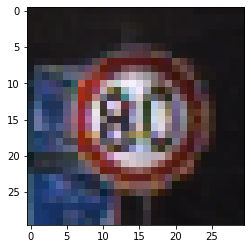

[38]


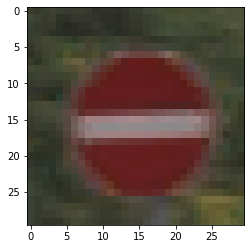

[9]


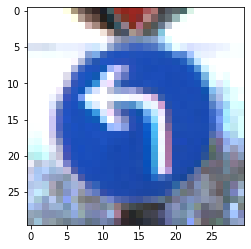

[28]


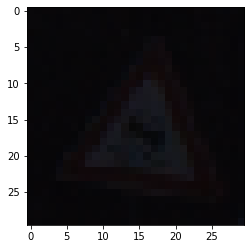

[16]


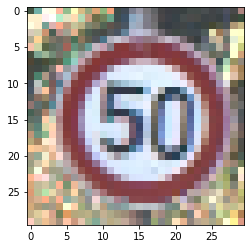

[12]


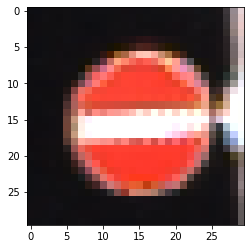

[9]


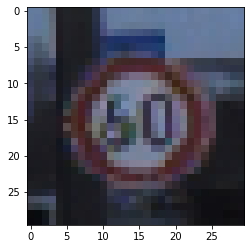

[23]


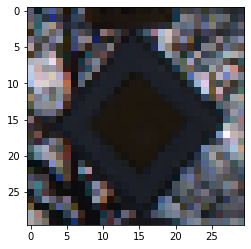

[4]


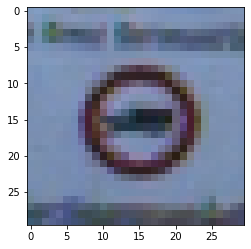

[8]


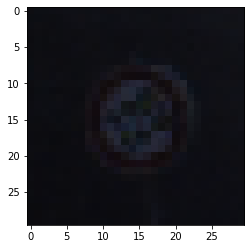

[5]


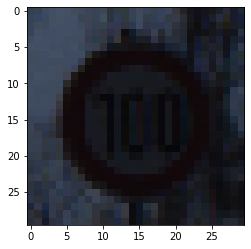

[40]


In [255]:
count = 0
for i in os.listdir("./DataSet/Test/"):
    if count>40:
        break
    img = image.load_img(path = "./DataSet/Test/" + i, target_size=(img_size,img_size,3))
    plt.imshow(img)
    plt.show()
    
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #images = np.vstack([img])
    
    output = model.predict_classes(img)
    print(output)
    
    count +=1

In [386]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    labels = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data = []
    
    for img in imgs:
        images = image.load_img("./DataSet/"+img, target_size=(img_size,img_size))
        data.append(np.array(images))
    X_test = np.array(data)
    return X_test,labels

In [387]:
X_test,y_test = testing('./DataSet/Test.csv')

In [409]:
X_test.shape

(12630, 30, 30, 3)

In [388]:
y_pred = model.predict_classes(X_test)

In [389]:
y_pred

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [390]:
from sklearn.metrics import accuracy_score

In [391]:
print(accuracy_score(y_test,y_pred))

0.9403800475059383


In [412]:
img = image.load_img("C://Users//DELL//Python for data science class//Dee learning self study//Traffic sign classification using neural network//image_net.jpg",target_size=(img_size,img_size,3))

In [413]:
img = image.img_to_array(img)
img = np.expand_dims(img,axis=0)
#img = np.vstack([img])
    
output = model.predict_classes(img)
print(output)

[3]


In [393]:
model.save('./training/TSP.h5')

In [394]:
import os

In [395]:
from tensorflow.keras.models import load_model

In [396]:
model = load_model('./training/TSP.h5')

In [397]:
classes = {
    0:"Speed Limit (20km/h)",
    1:"Speed Limit (30km/h)",
    2:"Speed Limit (50km/h)",
    3:"Speed Limit (60km/h)",
    4:"Speed Limit (70km/h)",
    5:"Speed Limit (80km/h)",
    6:"End of Speed Limit (80km/h)",
    7:"Speed Limit (100km/h)",
    8:"Speed Limit (120km/h)",
    9:"No passing",
    10:"No passing veh over 3.5 tons",
    11:"Right-of-wat at interaction",
    12:"Priority Road",
    13:"Yeild",
    14:"Stop",
    15:"No Vehicles",
    16:"Vehicle > 3.5 ton is prohibited",
    17:"No Entry",
    18:"General Caution",
    19:"Dangerous Curve left",
    20:"Dangerous Curve Right",
    21:"Double Curve",
    22:"Bumpy Road",
    23:"Slippery Road",
    24:"Road Narrows on the right",
    25:"Road Work",
    26:"Traffic Signals",
    27:"Pedestrians",
    28:"Childrens Crossing",
    29:"Bicycles Crossing",
    30:"Beware of Ice/Snow",
    31:"Wild Animals Crossing",
    32:"End Speed + Passing limits",
    33:"Turn Right Ahead",
    34:"Turn Left Ahead",
    35:"Ahead Only",
    36:"Go straight or right",
    37:"Go straight or left",
    38:"Keep Right",
    39:"Keep Left",
    40:"Roundabout mandatory",
    41:"End of no passing",
    42:"End of no passing veh > 3.5 ton",
}

In [457]:
def testing_on_img(img):
    data = []
    imgs = image.load_img(img, target_size=(img_size,img_size))
    data.append(np.array(imgs))
    X = np.array(data)
    X = np.array(imgs)
    X = np.expand_dims(X,axis=0)
    
    pred = model.predict_classes(X)
    return imgs,pred

In [458]:
#img = np.array(img)
#img = np.expand_dims(img,axis=0)
#img.shape

[35] -> Ahead Only


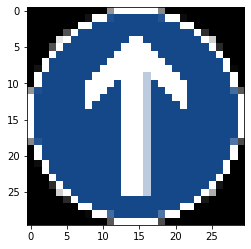

In [459]:
plot,prediction = testing_on_img("C:/Users/DELL/Python for data science class/Dee learning self study/Traffic sign classification using neural network/images.png")
plot,prediction = testing_on_img("C:/Users/DELL/Python for data science class/Dee learning self study/Traffic sign classification using neural network/Germany-Mandatory-Sign-Driving-straight-ahead-mandatory.png")
plt.imshow(plot)
print(f"{prediction} -> {classes[int(prediction)]}")